<a href="https://colab.research.google.com/github/innovativemaniacs/PandasPracticesWorkBook/blob/main/Request%20analysis%20of%20web%20request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests as req

In [32]:
import re
import csv

with open("/content/calgary_acess_log.txt", encoding='latin-1') as raw:
    raw_content = raw.readlines()


pattern = r'(\S+) - - \[(.*?)\] "(\S+) (\S+) (\S+)" (\d{3}) (\d+)'


with open("/content/calgary_api_requests.csv", mode='w', newline='') as file:
    writer = csv.writer(file)


    writer.writerow(['host', 'datetime', 'method', 'FilesRequested', 'protocol', 'status_code', 'response_size'])


    for line in raw_content:
        match = re.match(pattern, line)
        if match:
            writer.writerow(match.groups())

print(" Data parsed and saved as 'calgary_api_requests.csv'")


<ipython-input-32-189719738>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime_formatted'] = pd.to_datetime(df['datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')


DateParseError: Unknown datetime string format, unable to parse: 24/Oct/1994:13:41:41 -0600, at position 0

In [ ]:
df = pd.read_csv("/content/calgary_api_requests.csv")
print(df.head().to_markdown(index=False))



| host   | datetime                   | method   | FilesRequested   | protocol   |   status_code |   response_size |
|:-------|:---------------------------|:---------|:-----------------|:-----------|--------------:|----------------:|
| local  | 24/Oct/1994:13:41:41 -0600 | GET      | index.html       | HTTP/1.0   |           200 |             150 |
| local  | 24/Oct/1994:13:41:41 -0600 | GET      | 1.gif            | HTTP/1.0   |           200 |            1210 |
| local  | 24/Oct/1994:13:43:13 -0600 | GET      | index.html       | HTTP/1.0   |           200 |            3185 |
| local  | 24/Oct/1994:13:43:14 -0600 | GET      | 2.gif            | HTTP/1.0   |           200 |            2555 |
| local  | 24/Oct/1994:13:43:15 -0600 | GET      | 3.gif            | HTTP/1.0   |           200 |           36403 |


In [ ]:
df.dropna(inplace=True)
print(df.head().to_markdown(index=False))

| host   | datetime                   | method   | FilesRequested   | protocol   |   status_code |   response_size |
|:-------|:---------------------------|:---------|:-----------------|:-----------|--------------:|----------------:|
| local  | 24/Oct/1994:13:41:41 -0600 | GET      | index.html       | HTTP/1.0   |           200 |             150 |
| local  | 24/Oct/1994:13:41:41 -0600 | GET      | 1.gif            | HTTP/1.0   |           200 |            1210 |
| local  | 24/Oct/1994:13:43:13 -0600 | GET      | index.html       | HTTP/1.0   |           200 |            3185 |
| local  | 24/Oct/1994:13:43:14 -0600 | GET      | 2.gif            | HTTP/1.0   |           200 |            2555 |
| local  | 24/Oct/1994:13:43:15 -0600 | GET      | 3.gif            | HTTP/1.0   |           200 |           36403 |


In [ ]:
df

,host,datetime,method,FilesRequested,protocol,status_code,response_size
0,local,24/Oct/1994:13:41:41 -0600,GET,index.html,HTTP/1.0,200,150
1,local,24/Oct/1994:13:41:41 -0600,GET,1.gif,HTTP/1.0,200,1210
2,local,24/Oct/1994:13:43:13 -0600,GET,index.html,HTTP/1.0,200,3185
3,local,24/Oct/1994:13:43:14 -0600,GET,2.gif,HTTP/1.0,200,2555
4,local,24/Oct/1994:13:43:15 -0600,GET,3.gif,HTTP/1.0,200,36403
...,...,...,...,...,...,...,...
664342,local,11/Oct/1995:14:10:59 -0600,GET,12158.gif,HTTP/1.0,304,0
664343,local,11/Oct/1995:14:11:38 -0600,GET,index.html,HTTP/1.0,200,3020
664344,local,11/Oct/1995:14:11:39 -0600,GET,2.gif,HTTP/1.0,200,2555
664345,local,11/Oct/1995:14:11:40 -0600,GET,3.gif,HTTP/1.0,200,36403


In [ ]:
df.shape
df.dtypes

,0
host,object
datetime,object
method,object
FilesRequested,object
protocol,object
status_code,int64
response_size,int64


In [ ]:

most_frequent_host = df['host'].value_counts().idxmax()
print(f"The most frequent host is: {most_frequent_host}")


most_requested_file = df['FilesRequested'].value_counts().idxmax()
print(f"The most requested file is: {most_requested_file}")

The most frequent host is: local
The most requested file is: index.html


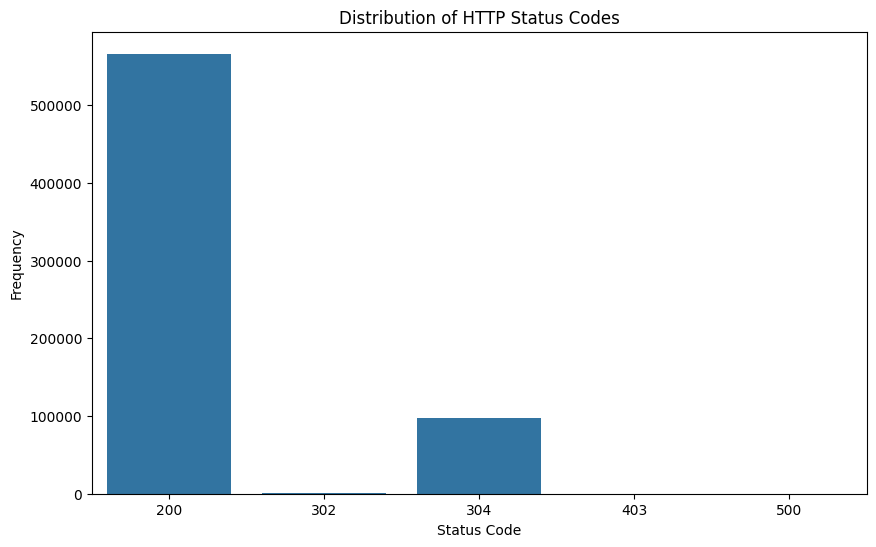

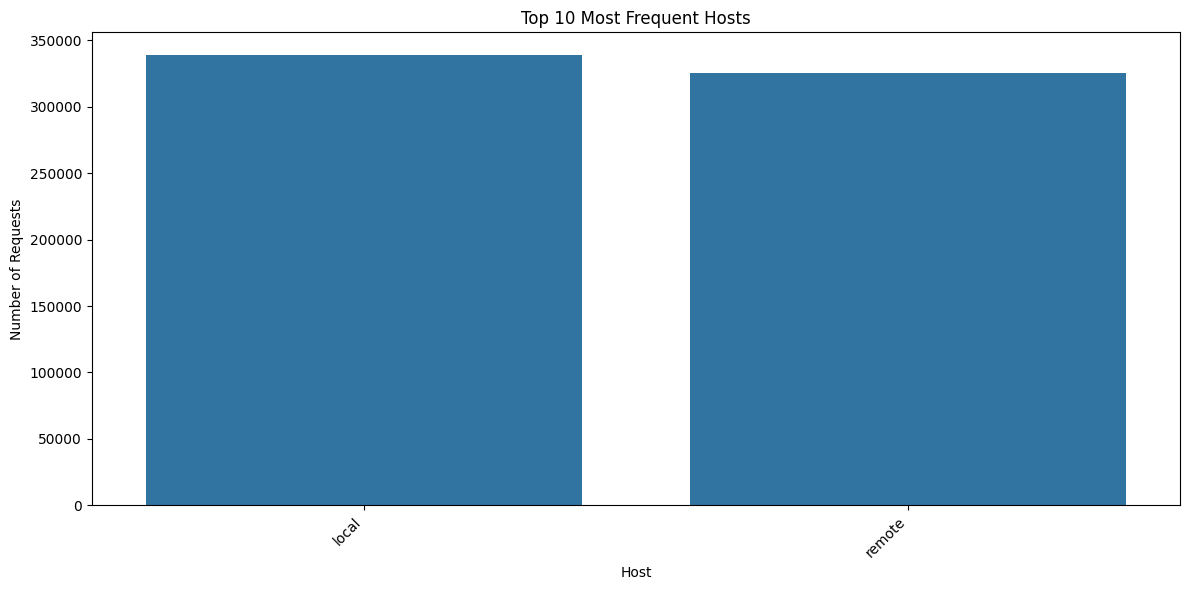

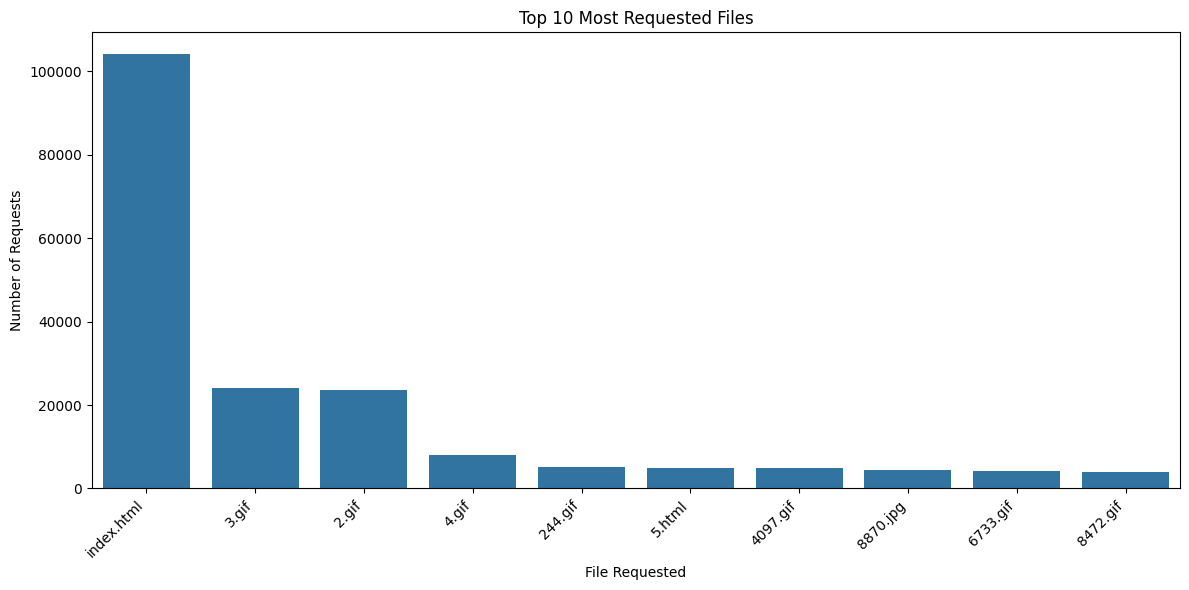

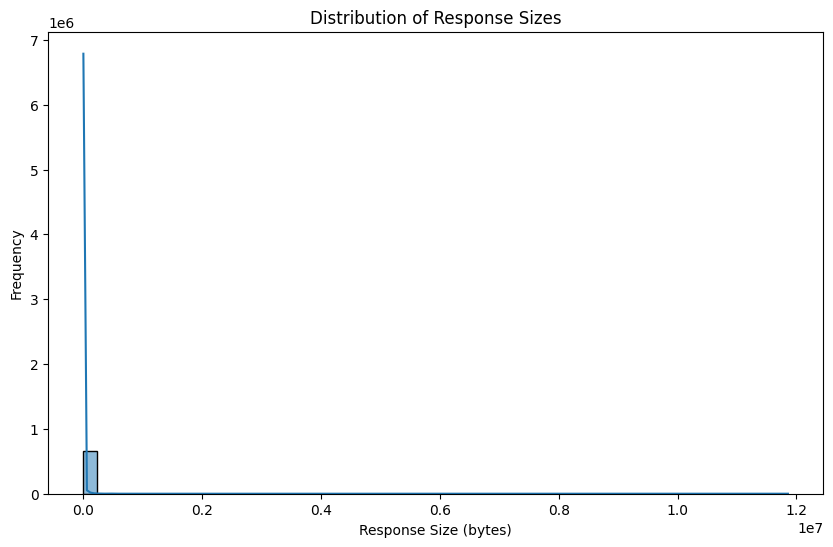

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status_code')
plt.title('Distribution of HTTP Status Codes')
plt.xlabel('Status Code')
plt.ylabel('Frequency')
plt.show()


most_frequent_hosts = df['host'].value_counts().nlargest(10) # Get top 10 hosts
plt.figure(figsize=(12, 6))
sns.barplot(x=most_frequent_hosts.index, y=most_frequent_hosts.values)
plt.title('Top 10 Most Frequent Hosts')
plt.xlabel('Host')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


most_requested_files = df['FilesRequested'].value_counts().nlargest(10) # Get top 10 files
plt.figure(figsize=(12, 6))
sns.barplot(x=most_requested_files.index, y=most_requested_files.values)
plt.title('Top 10 Most Requested Files')
plt.xlabel('File Requested')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


df['response_size'] = pd.to_numeric(df['response_size'], errors='coerce')
df.dropna(subset=['response_size'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='response_size', bins=50, kde=True)
plt.title('Distribution of Response Sizes')
plt.xlabel('Response Size (bytes)')
plt.ylabel('Frequency')
plt.show()

In [31]:
print(df['datetime'])

# df['datetime'] = pd.to_datetime(df['datetime'])
# df['date'] = df['datetime'].dt.date

# files_by_day = df['date'].value_counts()
# most_active_day = files_by_day.idxmax()

# print(f"The day with the most files generated is: {most_active_day}")



0         24/Oct/1994:13:41:41 -0600
1         24/Oct/1994:13:41:41 -0600
2         24/Oct/1994:13:43:13 -0600
3         24/Oct/1994:13:43:14 -0600
4         24/Oct/1994:13:43:15 -0600
                     ...            
664342    11/Oct/1995:14:10:59 -0600
664343    11/Oct/1995:14:11:38 -0600
664344    11/Oct/1995:14:11:39 -0600
664345    11/Oct/1995:14:11:40 -0600
664346    11/Oct/1995:14:14:17 -0600
Name: datetime, Length: 664347, dtype: object


In [40]:
df = pd.read_csv("/content/calgary_api_requests.csv")


df.dropna(inplace=True)


df['datetime'] = df['datetime'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)


df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce',utc='true')


df.dropna(subset=['datetime'], inplace=True)


if pd.api.types.is_datetime64_any_dtype(df['datetime']):

    df['date'] = df['datetime'].dt.date


    files_by_day = df['date'].value_counts()

    if not files_by_day.empty:
        most_active_day = files_by_day.idxmax()
        print(f"The day with the most files generated is: {most_active_day}")
    else:
        print("No valid datetime data found to determine the most active day.")
else:
    print("The 'datetime' column is not of datetime dtype after processing.")



The day with the most files generated is: 1995-03-29


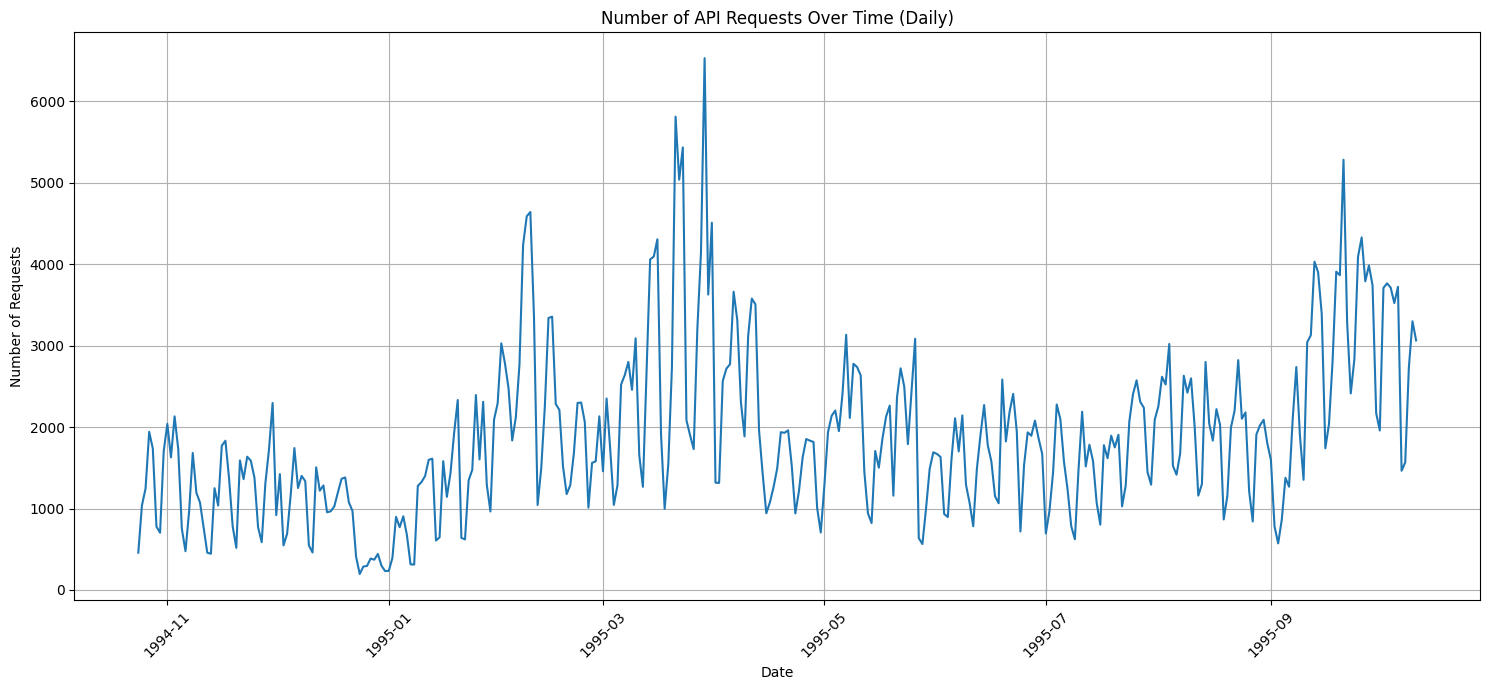

In [41]:
if not pd.api.types.is_datetime64_any_dtype(df['datetime']):

    df['datetime'] = df['datetime'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)

    df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce', utc=True)


df.dropna(subset=['datetime'], inplace=True)


if pd.api.types.is_datetime64_any_dtype(df['datetime']):
    df['date'] = df['datetime'].dt.date


    requests_by_day = df['date'].value_counts().sort_index() # Sort by date

    if not requests_by_day.empty:
        plt.figure(figsize=(15, 7))
        requests_by_day.plot(kind='line')
        plt.title('Number of API Requests Over Time (Daily)')
        plt.xlabel('Date')
        plt.ylabel('Number of Requests')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True)
        plt.show()
    else:
        print("No valid date data found to plot requests over time.")
else:
    print("The 'datetime' column is not of datetime dtype, cannot plot requests over time.")